**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO **_EXPLAIN MODEL PREDICTIONS USING SHAP VALUES IN PYTHON_**. 🐍📊🤖**

This script demonstrates how to use **SHAP (SHapley Additive exPlanations)** to interpret predictions made by a machine learning model.
SHAP helps identify how much each feature contributes to the final output, offering transparency in model behavior.

### 📦 Install and Import Required Libraries

We’ll use SHAP for interpretability and RandomForestClassifier for model training.

In [1]:
# Install SHAP (if not installed)
# !pip install shap

# Import libraries
import shap
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### 🧩 Load and Prepare the Dataset

We’ll use the Iris dataset for simplicity.

In [2]:
# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🤖 Train the Model

We train a simple Random Forest Classifier for demonstration.

In [3]:
# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 🔍 Initialize SHAP Explainer

We create a SHAP explainer to analyze feature impact on model predictions.

In [4]:
# Create SHAP explainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_test)

# Aggregate to (n_samples, n_features)
shap_values_global = np.mean(np.abs(np.stack(shap_values, axis=-1)), axis=-1)

### 📊 Visualize Feature Importance (Global View)

SHAP summary plot shows the impact of each feature across all predictions.

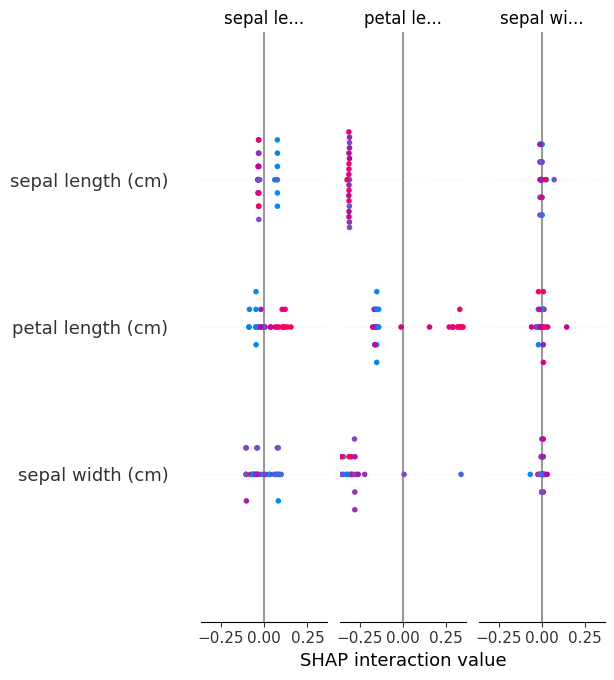

In [5]:
# Plot summary of feature importance
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

### 🧠 Explain a Single Prediction (Local View)

We can also visualize the contribution of each feature for an individual prediction.

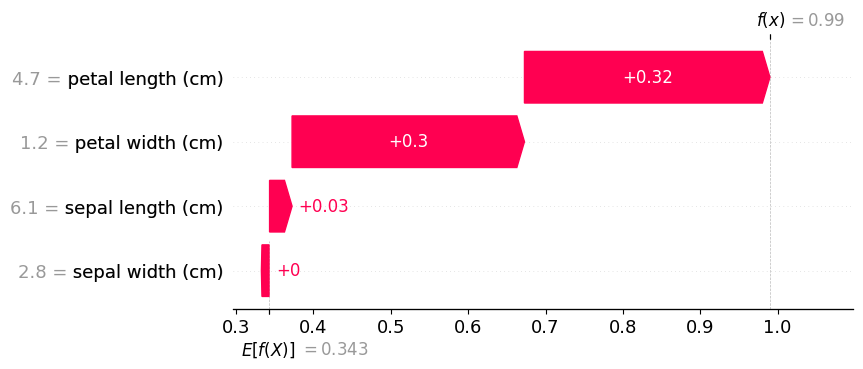

In [6]:
# Initialize the new SHAP Explainer on the trained model and test data
# This automatically detects the correct explainer type (Tree, Linear, etc.)
exp = shap.Explainer(model)(X_test)

# Select the sample index to explain
i = 0

# Get the model's predicted class for the selected sample
pred_class = int(model.predict(X_test.iloc[[i]])[0])

# Visualize the local SHAP explanation as a waterfall plot
# This shows how each feature contributes to pushing the prediction higher or lower
shap.plots.waterfall(exp[i, :, pred_class])

### ✅ Interpretation
- Red features push predictions higher toward a certain class.
- Blue features push predictions lower.
- The length of each bar in the plot indicates the strength of the impact.
- Use SHAP to debug, trust, and explain your model predictions — especially in critical AI systems.